**<font size=10>-Student Loans in us 2021</font>**

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
df=pd.read_excel('D:\\AHprojects\\Student Loan Debt by School 2020-2021.xlsx')

In [68]:
#quick look about the information of the dataset
df.head(10)

,OPE ID,School,City,State,Zip Code,School Type,Loan Type,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
0,1051,UNIVERSITY OF ALABAMA,TUSCALOOSA,AL,35487.0,Public,Subsidized,7594,7622,33040862,7622,16774054
1,1052,UNIVERSITY OF ALABAMA AT BIRMINGHAM,BIRMINGHAM,AL,35294.0,Public,Subsidized,4272,4352,18590061,4352,9058344
2,1009,AUBURN UNIVERSITY,AUBURN,AL,36849.0,Public,Subsidized,4504,4504,19474542,4535,10142490
3,1057,UNIVERSITY OF SOUTH ALABAMA,MOBILE,AL,36688.0,Public,Subsidized,3438,3487,15061071,3487,7557853
4,1047,TROY UNIVERSITY,TROY,AL,36082.0,Public,Subsidized,4334,4355,18467508,4355,7395839
5,1036,SAMFORD UNIVERSITY,BIRMINGHAM,AL,35229.0,Private-Nonprofit,Subsidized,638,638,2725011,638,1412105
6,1024,UNIVERSITY OF WEST ALABAMA,LIVINGSTON,AL,35470.0,Public,Subsidized,1085,1098,4552993,1098,2306439
7,42267,ALABAMA COLLEGE OF OSTEOPATHIC MEDICINE,DOTHAN,AL,36303.0,Private-Nonprofit,Subsidized,0,0,0,0,0
8,1020,JACKSONVILLE STATE UNIVERSITY,JACKSONVILLE,AL,36265.0,Public,Subsidized,2894,2895,12057276,2895,6150665
9,1050,TUSKEGEE UNIVERSITY,TUSKEGEE,AL,36088.0,Private-Nonprofit,Subsidized,1104,1107,4957913,1108,2482547


In [69]:
df.columns.tolist()

['OPE ID',
 'School',
 'City',
 'State',
 'Zip Code',
 'School Type',
 'Loan Type',
 'Recipients',
 '# of Loans Originated',
 '$ of Loans Originated',
 '# of Disbursements',
 '$ of Disbursements']

In [70]:
# Examining how many records are in the dataset.

print('Total Number Of Rows and Columns :',df.shape)
print('----------------------')
print('Total Number Of Elements :',df.size)

Total Number Of Rows and Columns : (42320, 12)
----------------------
Total Number Of Elements : 507840


In [71]:
# Checking Data types and if we have any NA.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42320 entries, 0 to 42319
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OPE ID                 42320 non-null  int64  
 1   School                 42320 non-null  object 
 2   City                   33420 non-null  object 
 3   State                  40280 non-null  object 
 4   Zip Code               33420 non-null  float64
 5   School Type            42320 non-null  object 
 6   Loan Type              42320 non-null  object 
 7   Recipients             42320 non-null  int64  
 8   # of Loans Originated  42320 non-null  int64  
 9   $ of Loans Originated  42320 non-null  int64  
 10  # of Disbursements     42320 non-null  int64  
 11  $ of Disbursements     42320 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 3.9+ MB


In [72]:
#Null values
df.isnull().sum()

OPE ID                      0
School                      0
City                     8900
State                    2040
Zip Code                 8900
School Type                 0
Loan Type                   0
Recipients                  0
# of Loans Originated       0
$ of Loans Originated       0
# of Disbursements          0
$ of Disbursements          0
dtype: int64

In [73]:
# Null values in Percentage.

print(round(100*(df.isnull().sum()/len(df.index)),2))

OPE ID                    0.00
School                    0.00
City                     21.03
State                     4.82
Zip Code                 21.03
School Type               0.00
Loan Type                 0.00
Recipients                0.00
# of Loans Originated     0.00
$ of Loans Originated     0.00
# of Disbursements        0.00
$ of Disbursements        0.00
dtype: float64


**<font size="3">-While our monitoring, it has been recognized that nearly all columns are fully completed, except for the 'City' and'Zipcode' columns, each having an approximately 21% incompleteness rate. Additionally, the 'State' column displays a 5% incompleteness, but the 'Zip code' column is considered non-essential for imputation purposes.**</fontsize>

In [74]:
#Dividing the data in to numerical and catagorical data to excute sklearn simple imputer to fill the missing values

object_df=df.select_dtypes(include=['object'])
num_df=df.select_dtypes(exclude=['object'])

In [75]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42320 entries, 0 to 42319
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OPE ID                 42320 non-null  int64  
 1   Zip Code               33420 non-null  float64
 2   Recipients             42320 non-null  int64  
 3   # of Loans Originated  42320 non-null  int64  
 4   $ of Loans Originated  42320 non-null  int64  
 5   # of Disbursements     42320 non-null  int64  
 6   $ of Disbursements     42320 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 2.3 MB


In [76]:
object_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42320 entries, 0 to 42319
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   School       42320 non-null  object
 1   City         33420 non-null  object
 2   State        40280 non-null  object
 3   School Type  42320 non-null  object
 4   Loan Type    42320 non-null  object
dtypes: object(5)
memory usage: 1.6+ MB


In [77]:
#Impute 'City' and 'State' columns with the most frequent strategy 

from sklearn.impute import SimpleImputer
simpleimputer = SimpleImputer(strategy='most_frequent')
object_df=simpleimputer.fit_transform(object_df)

In [78]:
#Checking the the type of the data stored in object_df
type(object_df)

numpy.ndarray

In [79]:
#Converting the data stored from array to DataFrame

object_df=pd.DataFrame(object_df,columns=['School','City','State','School Type','Loan Type'])
object_df.head()

,School,City,State,School Type,Loan Type
0,UNIVERSITY OF ALABAMA,TUSCALOOSA,AL,Public,Subsidized
1,UNIVERSITY OF ALABAMA AT BIRMINGHAM,BIRMINGHAM,AL,Public,Subsidized
2,AUBURN UNIVERSITY,AUBURN,AL,Public,Subsidized
3,UNIVERSITY OF SOUTH ALABAMA,MOBILE,AL,Public,Subsidized
4,TROY UNIVERSITY,TROY,AL,Public,Subsidized


In [80]:
#Concatenating the num_df and object_df in a new dataframe

frames=[object_df,num_df]
sec_df= pd.concat(frames,axis=1)
sec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42320 entries, 0 to 42319
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   School                 42320 non-null  object 
 1   City                   42320 non-null  object 
 2   State                  42320 non-null  object 
 3   School Type            42320 non-null  object 
 4   Loan Type              42320 non-null  object 
 5   OPE ID                 42320 non-null  int64  
 6   Zip Code               33420 non-null  float64
 7   Recipients             42320 non-null  int64  
 8   # of Loans Originated  42320 non-null  int64  
 9   $ of Loans Originated  42320 non-null  int64  
 10  # of Disbursements     42320 non-null  int64  
 11  $ of Disbursements     42320 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 3.9+ MB


In [81]:
#Checking for dupicated values

sec_df.duplicated().sum()

30

In [82]:
#Dropping duplicate values

sec_df.drop_duplicates(inplace=True)

In [83]:
#Dropping values which 'Recipients' and 'Number of Loans Originated' = 0 

sec_df.drop(sec_df[(sec_df['Recipients']==0) & (sec_df['# of Loans Originated']==0)].index,inplace=True)

In [84]:
#Calculating the absolute difference between Loans originated and loans disbursed which provides 
#a clear understanding of the overall imbalance  between these two values, irrespective of their individual signs.

sec_df['Available Credit'] =sec_df['$ of Loans Originated'] - sec_df['$ of Disbursements']

#you can determine the net amount by which loans originated either exceeds or falls short of disbursements.

<font size=3>

**-The difference between loans originated and loans disbursement represents the amount that has been approved but not yet disbursed.**


</fontsize>

In [85]:
sec_df.head()

,School,City,State,School Type,Loan Type,OPE ID,Zip Code,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements,Available Credit
0,UNIVERSITY OF ALABAMA,TUSCALOOSA,AL,Public,Subsidized,1051,35487.0,7594,7622,33040862,7622,16774054,16266808
1,UNIVERSITY OF ALABAMA AT BIRMINGHAM,BIRMINGHAM,AL,Public,Subsidized,1052,35294.0,4272,4352,18590061,4352,9058344,9531717
2,AUBURN UNIVERSITY,AUBURN,AL,Public,Subsidized,1009,36849.0,4504,4504,19474542,4535,10142490,9332052
3,UNIVERSITY OF SOUTH ALABAMA,MOBILE,AL,Public,Subsidized,1057,36688.0,3438,3487,15061071,3487,7557853,7503218
4,TROY UNIVERSITY,TROY,AL,Public,Subsidized,1047,36082.0,4334,4355,18467508,4355,7395839,11071669


In [86]:
print('Total Loans Originated in US at 2021:',(sec_df['$ of Loans Originated'].sum()/1000000000000).round(2),'Trillion','\n')
print('The percentage of the Available Credit ',((sec_df['Available Credit'].sum())/(sec_df['$ of Loans Originated'].sum())*100).round(2),'%')

Total Loans Originated in US at 2021: 1.44 Trillion 

The percentage of the Available Credit  49.87 %


 **<font size="3">
-The uncollected portion, around 50% of total loans originated, indicates a significant divergence between approved amounts and actual disbursements. This variance may result from processing delays or instances where borrowers didn't need the full approved sum.**
</font> 

In [87]:
sec_df['School Type'].value_counts()

School Type
Private-Nonprofit     12128
Public                10634
Proprietary           10502
Foreign-Public         1221
Foreign-Private         421
Foreign-For-Profit       65
Name: count, dtype: int64

In [88]:
#Minimzing the 'School Type' from 6 types into 3 types as it is more specific

sec_df['School Type']=sec_df['School Type'].replace(['Foreign-Public','Foreign-Private','Foreign-For-Profit'],
                                                    ['Public','Private-Nonprofit','Proprietary'])
sec_df['School Type'].value_counts()

School Type
Private-Nonprofit    12549
Public               11855
Proprietary          10567
Name: count, dtype: int64

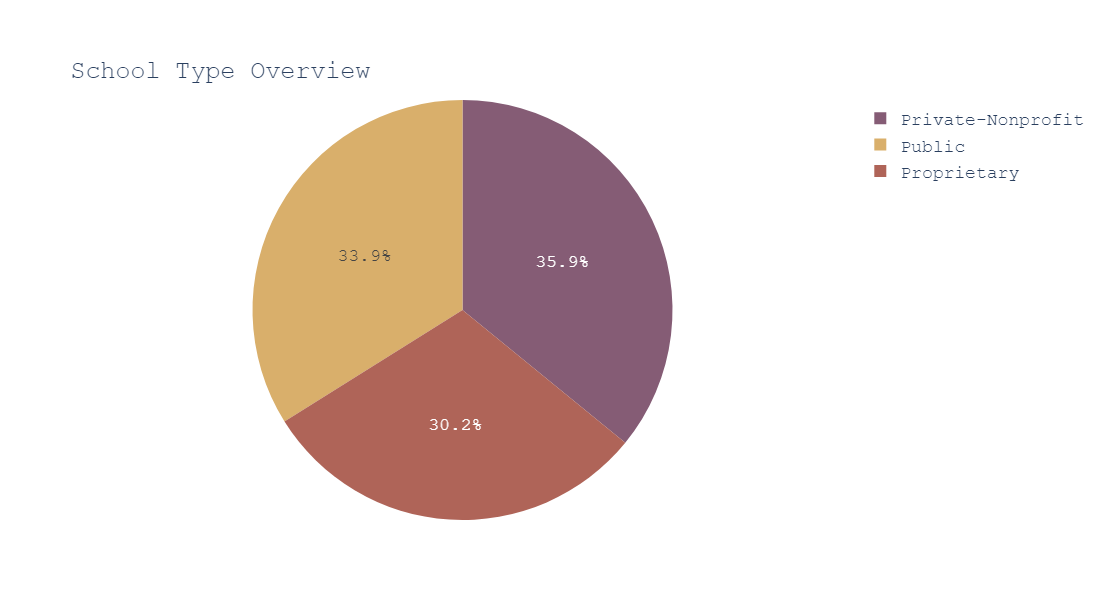

In [109]:
fi= px.pie(sec_df['School Type'], names='School Type',
             height=600, width=800, 
             title='School Type Overview',color_discrete_sequence=px.colors.qualitative.Antique)
fi.update_layout(font=dict(size=18,family="Courier New, bold"),title={'y':0.9,
        'x':0.2,'xanchor': 'center',
        'yanchor': 'top'})

fi.show()

**<font size=3>
The distribution appears to be relatively even, with 'Private-Nonprofit' schools showing a slightly higher frequency.**
</font>

In [90]:
sec_df['Loan Type'].value_counts()

Loan Type
Total                           21130
Unsubsidized - Undergraduate     3914
Subsidized                       3913
Parent Plus                      2790
Unsubsidized - Graduate          1799
Grad Plus                        1425
Name: count, dtype: int64

In [91]:
# Joining 'Unsubsidized - Undergraduate' and 'Unsubsidized - Graduate' in 'Unsubsidized' Loan Type

sec_df['Loan Type']=sec_df['Loan Type'].replace(['Unsubsidized - Undergraduate','Unsubsidized - Graduate'],'Unsubsidized')
sec_df['Loan Type'].value_counts()

Loan Type
Total           21130
Unsubsidized     5713
Subsidized       3913
Parent Plus      2790
Grad Plus        1425
Name: count, dtype: int64

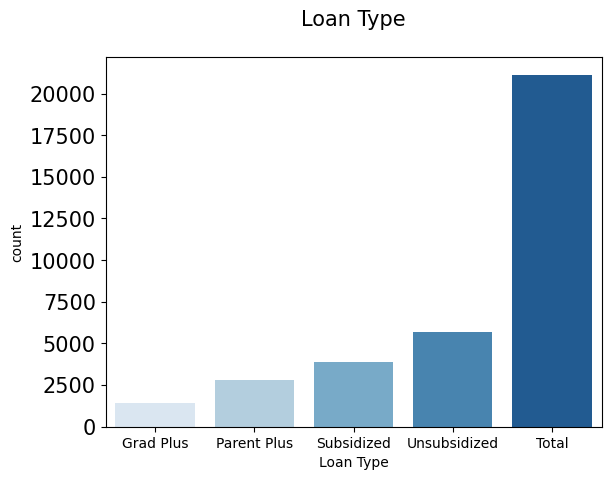

In [92]:
sns.countplot(x=sec_df['Loan Type'],palette="Blues",order=sec_df['Loan Type'].value_counts( ascending=True).index)
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)

plt.title('Loan Type\n',size=15)
plt.show()

**<font size=3>  
-'Total' Loan Type is the most frequently used, and following it by a significant margin is the 'Unsubsidized' Loan Type. This could indicate that borrowers might be influenced by factors such as interest rates, eligibility criteria, borrower preferences or books, and living expenses.</font>**

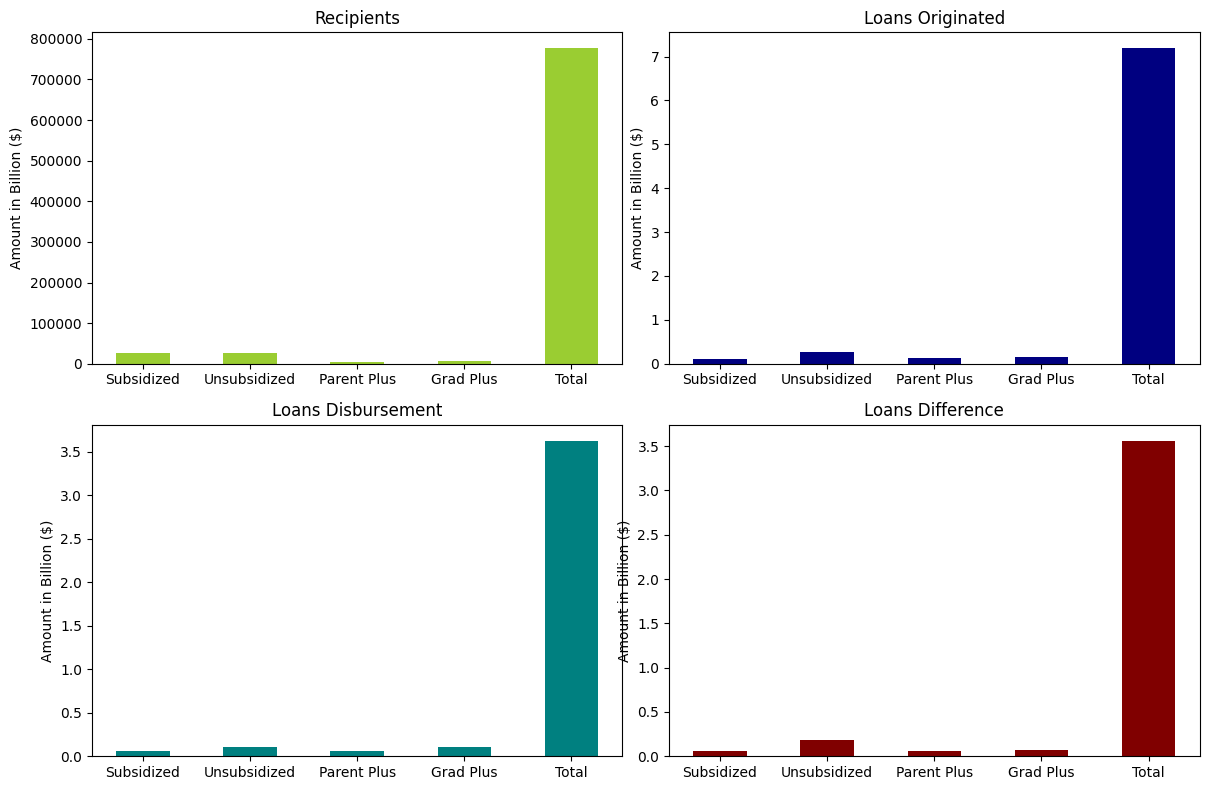

In [93]:
loan_types =sec_df['Loan Type']
recipients = sec_df['Recipients']
loans_originated =sec_df['$ of Loans Originated']/1000000000 # Represented in dollars
loans_disbursement = sec_df['$ of Disbursements']/1000000000 # Represented in dollars
loans_difference =sec_df['Available Credit']/1000000000      # Represented in dollars

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
bar_width = 0.50

axes[0, 0].bar(loan_types, recipients, bar_width, label='Recipients', color='Yellowgreen')
axes[0, 0].set_title('Recipients')

axes[0, 1].bar(loan_types, loans_originated, bar_width, label='Loans Originated', color='navy')
axes[0, 1].set_title('Loans Originated')

axes[1, 0].bar(loan_types, loans_disbursement, bar_width, label='Loans Disbursement', color='teal')
axes[1, 0].set_title('Loans Disbursement')

axes[1, 1].bar(loan_types, loans_difference, bar_width, label='Loans Difference', color='maroon')
axes[1, 1].set_title('Loans Difference')
# Adjust layout
plt.tight_layout()

for ax in axes.flat:
    ax.ticklabel_format(axis='y', style='plain', useOffset=False)
    ax.set_ylabel('Amount in Billion ($)')
plt.show()

In [94]:
group=sec_df.groupby(['School','State','School Type'])['$ of Loans Originated'].max().sort_values(ascending=False).head(15)
group=pd.DataFrame(group)
group

,,,$ of Loans Originated
School,State,School Type,
ARIZONA STATE UNIVERSITY,AZ,Public,7191429875
NEW YORK UNIVERSITY,NY,Private-Nonprofit,5930757481
LIBERTY UNIVERSITY,VA,Private-Nonprofit,5732942527
PENNSYLVANIA STATE UNIVERSITY (THE),PA,Public,4712266283
CAPELLA UNIVERSITY,MN,Proprietary,4573718058
"RUTGERS, THE STATE UNIVERSITY OF NEW JERSEY",NJ,Public,3967970215
GRAND CANYON UNIVERSITY,AZ,Proprietary,3775223649
UNIVERSITY OF SOUTHERN CALIFORNIA,CA,Private-Nonprofit,3586571353
NOVA SOUTHEASTERN UNIVERSITY-DAVIE,FL,Private-Nonprofit,3440319213




**<font size="3">-Arizona State University is acknowledged as the leading public school with the highest number of originated loans,totaling 7.2Billion.</font>**


**<font size="3">-It is observed that the top five universities stand markedly higher in comparison to the other universities listed.</font>**



In [95]:
#Creating a column to calculate the loans per student

sec_df['Loans Per Student']=(sec_df['$ of Loans Originated']/sec_df['Recipients']).round(2)
sec_df.head()

,School,City,State,School Type,Loan Type,OPE ID,Zip Code,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements,Available Credit,Loans Per Student
0,UNIVERSITY OF ALABAMA,TUSCALOOSA,AL,Public,Subsidized,1051,35487.0,7594,7622,33040862,7622,16774054,16266808,4350.92
1,UNIVERSITY OF ALABAMA AT BIRMINGHAM,BIRMINGHAM,AL,Public,Subsidized,1052,35294.0,4272,4352,18590061,4352,9058344,9531717,4351.61
2,AUBURN UNIVERSITY,AUBURN,AL,Public,Subsidized,1009,36849.0,4504,4504,19474542,4535,10142490,9332052,4323.83
3,UNIVERSITY OF SOUTH ALABAMA,MOBILE,AL,Public,Subsidized,1057,36688.0,3438,3487,15061071,3487,7557853,7503218,4380.77
4,TROY UNIVERSITY,TROY,AL,Public,Subsidized,1047,36082.0,4334,4355,18467508,4355,7395839,11071669,4261.08


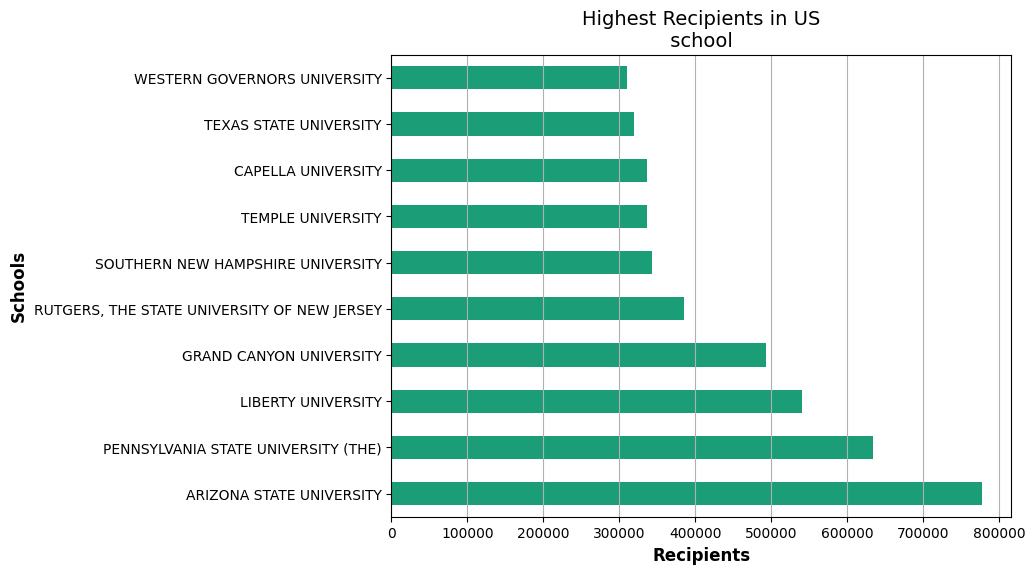

In [96]:
plt.figure(figsize=(8,6))
sec_df.groupby(['School'])['Recipients'].max().sort_values(ascending=False).head(10).plot(kind='barh',colormap='Dark2')
plt.title('Highest Recipients in US\n school ',size=14)
plt.xlabel('Recipients',size=12,fontweight='bold')
plt.ylabel('Schools',size=12,fontweight='bold')
plt.grid(axis="x")
#its clearly that arizona state university has the hgihest loans orginated so it probably has the highest recipients

#southern new hampshire university are not from the top 10 loans orginated in which is probably has a small loans ogrinated


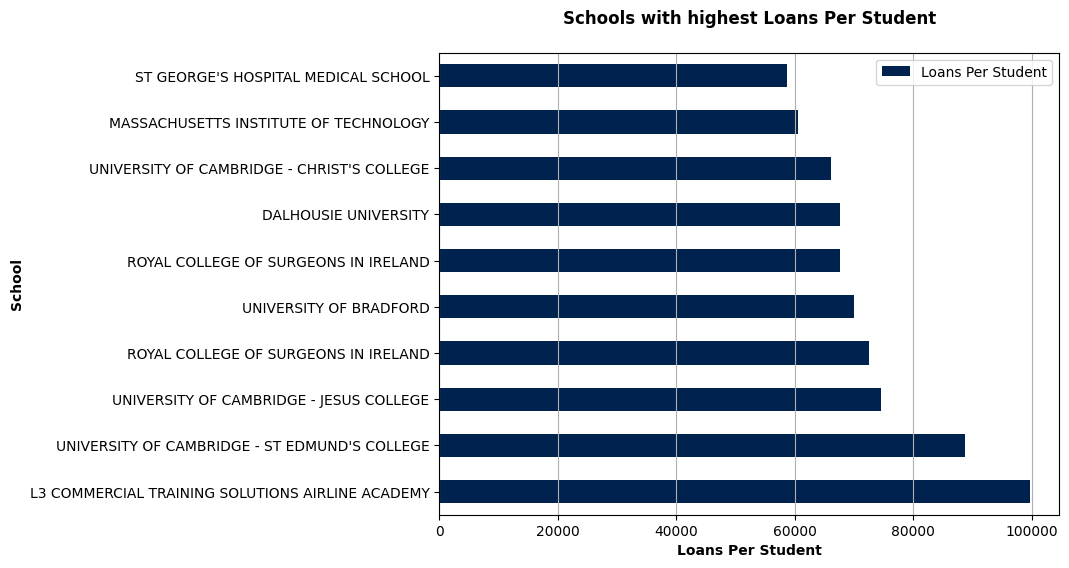

In [97]:
sec_df.loc[:,['School','Loans Per Student']].sort_values('Loans Per Student',ascending=False).head(10).plot(x='School',y='Loans Per Student',
                                                                                                            kind='barh',figsize=(8,6),
                                                                                                            colormap="cividis",grid=True)
plt.grid(axis='y')
plt.title('Schools with highest Loans Per Student\n',fontweight='bold',size=12)
plt.xlabel('Loans Per Student',fontweight='bold',size=10)
plt.ylabel('School',fontweight='bold',size=10)
plt.show()

In [98]:
#If the difference between loans originated and disbursements  is consistently large, it may indicate bottlenecks in the origination process
#This can mean that there are pending loans that have been approved but are still waiting to be funded or disbursed.
# This may indicate that loans from earlier periods or sources are being repaid or closed
positive_count = 0
zero_count = 0

# Iterate over the values in the column
for value in sec_df['Available Credit']:
    if value > 0:
        positive_count += 1

    else:
        zero_count += 1

print("Positive values of the difference :", positive_count, (positive_count/sec_df['Available Credit'].count()*100).round(2),'%')
print("Zero values :", zero_count, (zero_count/sec_df['Available Credit'].count()*100).round(2),'%')

Positive values of the difference : 34489 98.62 %
Zero values : 482 1.38 %


<font size=3>**
**-Zero values suggests that all loans originated have been fully disbursed and also indicate efficient utilization of funds.**
**-Positive values of the difference could occur for various reasons, such as the borrower not needing the full approved amount, delays in processing, or other administrative reasons.**
</font>

In [99]:
adf=sec_df.copy()

us_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
    'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
    'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
    'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
    'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
    'Wisconsin', 'Wyoming'
]

In [100]:
ds={
    'Total value of loans originated':adf.groupby('State')['$ of Loans Originated'].apply(lambda x:x.sum()),
'Total value of disbursements':(adf.groupby('State')['$ of Disbursements'].apply(lambda x:x.sum())/1000000000).round(2),
'Num of loans originated':adf.groupby('State')['# of Loans Originated'].apply(lambda x: x.sum()),
'Total available credits':(adf.groupby('State')['Available Credit'].apply(lambda x:x.sum())/1000000000).round(2),
'Num of Schools':adf.groupby('State')['School'].apply(lambda x: x.value_counts().sum()),
'Num of Recipients':adf.groupby('State')['Recipients'].apply(lambda x: x.sum())

}
rdf = pd.DataFrame(ds)
rdf['us-states']=us_states
rdf.reset_index(inplace=True)

for col in rdf.columns:
    rdf[col] = rdf[col].astype(str)
    
rdf['text']=rdf['us-states']+'<br>'+\
'Total Num of loans :'+rdf['Num of loans originated']+'<br>'+\
'Total disbursements:'+rdf['Total value of disbursements']+' $'+'<br>'+\
'Total available credits:'+rdf['Total available credits']+' $'+'<br>'+\
'Num of schools:'+rdf['Num of Schools']+'<br>'+\
'Total Recipients:'+rdf['Num of Recipients']

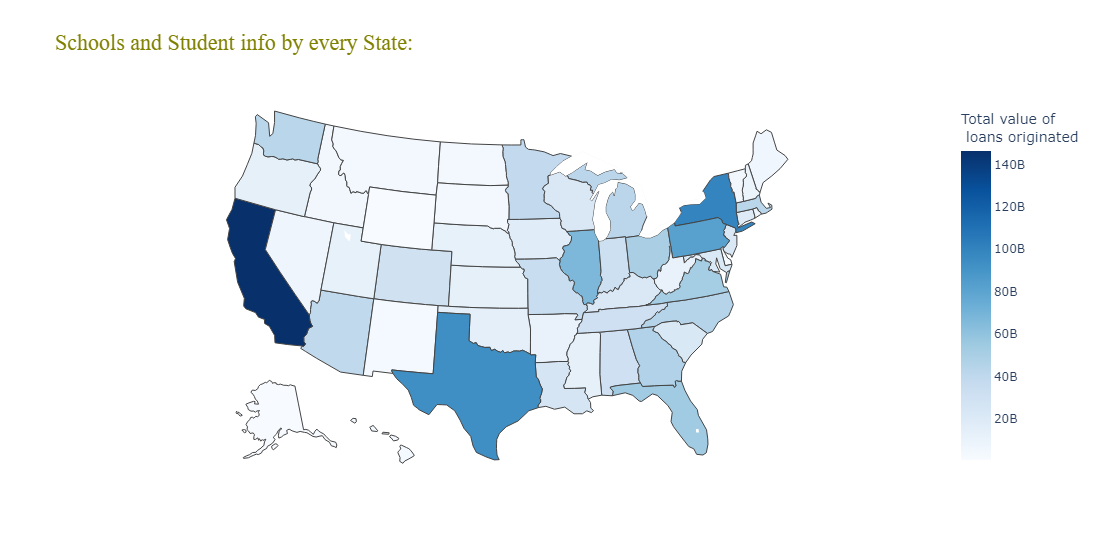

In [101]:
fsg = go.Figure(data=go.Choropleth(
    locations=rdf['State'],
    locationmode='USA-states',
    z=rdf['Total value of loans originated'],
    text=rdf['text'],
    colorscale='Blues',
    colorbar_title='Total value of <br> loans originated'
))


fsg.update_layout(title_text='Schools and Student info by every State:',title_font=dict(color='olive',
                                                                       family='bold',
                                                                       size=22),hoverlabel_bgcolor='maroon',hoverlabel_font_family='bold'
                  ,geo_scope='usa',width=1000,height=550,)

fsg.show()

**<font size=3>
**-It is a comprehensive overview about Schools and Students in every State, covering key aspects such as the total value of loans, number of loans, total schools, recipients, loans disbursement, and available credits.**
</font>**

**<font size=4>{The interactive map of 'Schools and Student info by every State'is in Figure.html as github doesn't support 'Plotly'}</font>**